In [1]:
#imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer,RobustScaler,MinMaxScaler
import wrangle_grades

In [2]:
df=wrangle_grades.wrangle_grades()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(4)
memory usage: 4.0 KB


In [3]:
df.describe()

,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000
mean,78.705882,77.500000,84.264706,81.852941
std,14.305429,10.297313,8.763026,10.953002
min,57.000000,65.000000,70.000000,65.000000
25%,70.000000,70.000000,78.000000,72.000000
50%,79.000000,75.000000,85.000000,81.000000
75%,92.000000,89.000000,94.000000,93.000000
max,100.000000,93.000000,96.000000,97.000000


In [4]:
train,test=train_test_split(df,train_size=.80,random_state=123)

In [5]:
print(train.shape,test.shape)

(81, 4) (21, 4)


In [6]:
scaler=StandardScaler(copy=True,with_mean=True,with_std=True).fit(train)

In [7]:
print("Mean: ",scaler.mean_)
print("Standard Deviation: ",[math.sqrt(i) for i in scaler.var_])

Mean:  [76.98765432 76.39506173 83.2962963  80.64197531]
Standard Deviation:  [13.428819044038946, 9.835284191097195, 8.336213494050003, 10.441262685543647]


In [8]:
train_scaled_data=scaler.transform(train)
test_scaled_data=scaler.transform(test)

In [9]:
train_scaled=pd.DataFrame(train_scaled_data,columns=train.columns).set_index([train.index])
test_scaled=pd.DataFrame(test_scaled_data,columns=test.columns).set_index([test.index])

In [10]:
train_scaled.head()

,exam1,exam2,exam3,final_grade
86,-0.520348,-1.158590,-0.635336,-0.348806
21,-0.520348,-1.158590,-0.635336,-0.348806
31,0.149853,-0.650216,0.204374,0.034289
33,-0.296948,-0.650216,-0.995212,-0.444580
102,-1.488415,-1.158590,-0.995212,-1.498092


In [11]:
test_scaled.head()

,exam1,exam2,exam3,final_grade
10,-1.413948,-1.158590,-1.595004,-1.210771
73,-0.520348,-1.158590,-0.635336,-0.348806
91,1.713654,1.383279,1.403959,1.470897
30,1.192387,1.383279,1.523918,1.566671
65,1.713654,1.383279,1.403959,1.470897


In [12]:
#Reverse the process
train_unscaled=pd.DataFrame(scaler.inverse_transform(train_scaled),columns=train.columns).set_index([train.index])
test_unscaled=pd.DataFrame(scaler.inverse_transform(test_scaled),columns=train.columns).set_index([test.index])

In [13]:
scaler=QuantileTransformer(n_quantiles=True,output_distribution='uniform',random_state=123,copy=True).fit(train)
train_scaled=pd.DataFrame(scaler.transform(train),columns=train.columns).set_index([train.index])
test_scaled=pd.DataFrame(scaler.transform(test),columns=test.columns).set_index([test.index])

In [14]:
train_scaled.head()

,exam1,exam2,exam3,final_grade
86,9.999999e-01,1.000000e-07,1.0,9.999999e-01
21,9.999999e-01,1.000000e-07,1.0,9.999999e-01
31,9.999999e-01,9.999999e-01,1.0,9.999999e-01
33,9.999999e-01,9.999999e-01,1.0,9.999999e-01
102,1.000000e-07,1.000000e-07,1.0,1.000000e-07


In [15]:
scaler=PowerTransformer(method='yeo-johnson',standardize=False,copy=True).fit(train)
train_scaled=pd.DataFrame(scaler.transform(train),columns=train.columns).set_index([train.index])
test_scaled=pd.DataFrame(scaler.transform(test),columns=test.columns).set_index([test.index])

In [25]:
train_scaled.sample(10)

,exam1,exam2,exam3,final_grade
54,0.400000,0.615385,0.166667,0.400000
16,0.266667,0.384615,0.083333,0.266667
50,-1.466667,-0.769231,-0.833333,-1.066667
39,1.400000,1.153846,0.833333,1.000000
49,-1.400000,-0.769231,-1.250000,-0.866667
48,-1.133333,-0.384615,-0.500000,-0.733333
1,1.266667,1.384615,0.916667,0.933333
60,-0.600000,-0.769231,-0.583333,-0.266667
61,-1.133333,-0.384615,-0.500000,-0.733333
33,-0.400000,-0.384615,-0.833333,-0.333333


In [17]:
scaler=MinMaxScaler(copy=True,feature_range=(0,1)).fit(train)
train_scaled=pd.DataFrame(scaler.transform(train),columns=train.columns).set_index([train.index])
test_scaled=pd.DataFrame(scaler.transform(test),columns=test.columns).set_index([test.index])

In [18]:
train_scaled.head()

,exam1,exam2,exam3,final_grade
86,0.302326,0.000000,0.307692,0.37500
21,0.302326,0.000000,0.307692,0.37500
31,0.511628,0.178571,0.576923,0.50000
33,0.372093,0.178571,0.192308,0.34375
102,0.000000,0.000000,0.192308,0.00000


In [19]:
scaler=RobustScaler(quantile_range=(25.0,75.0),copy=True,with_centering=True,with_scaling=True).fit(train)
train_scaled=pd.DataFrame(scaler.transform(train),columns=train.columns).set_index([train.index])
test_scaled=pd.DataFrame(scaler.transform(test),columns=test.columns).set_index([test.index])

In [20]:
train_scaled.head()

,exam1,exam2,exam3,final_grade
86,-0.600000,-0.769231,-0.583333,-0.266667
21,-0.600000,-0.769231,-0.583333,-0.266667
31,0.000000,-0.384615,0.000000,0.000000
33,-0.400000,-0.384615,-0.833333,-0.333333
102,-1.466667,-0.769231,-0.833333,-1.066667


In [21]:
#now let's explore the data
import split_scale
import seaborn as sns
import matplotlib.pyplot as plt
train,test=split_scale.split_my_data(df)

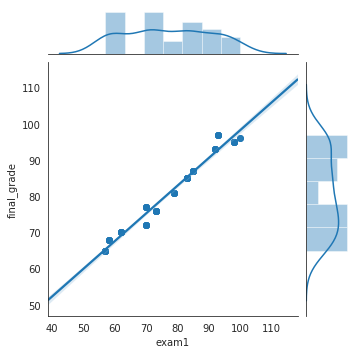

In [22]:
with sns.axes_style('white'):
    j=sns.jointplot('exam1','final_grade',data=train,kind='reg',height=5)
plt.show()    

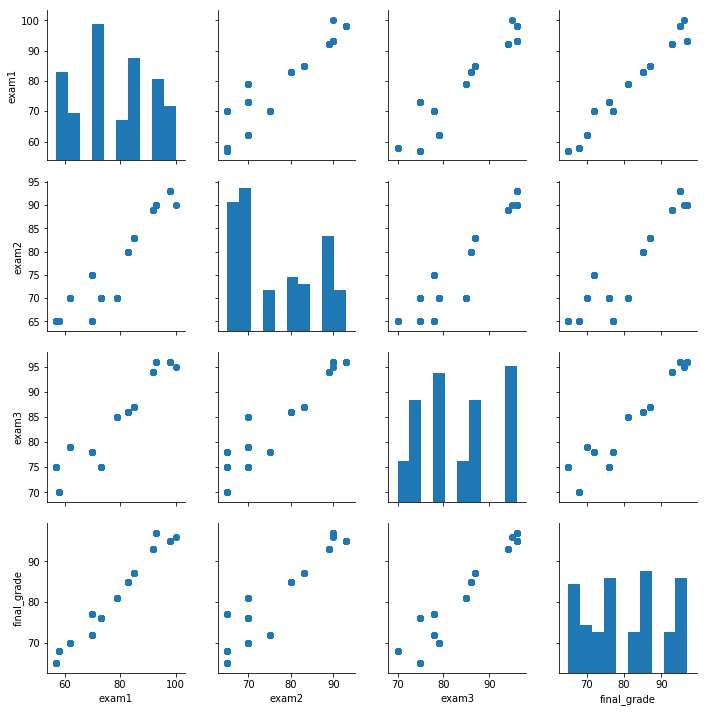

In [23]:
g=sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

(0, 4)

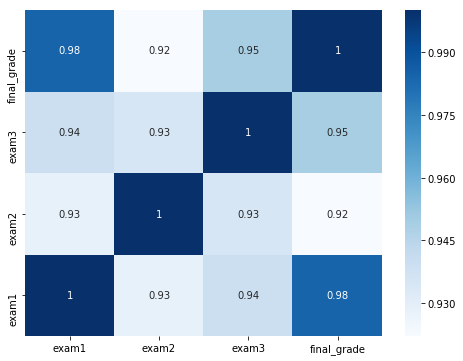

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),cmap='Blues',annot=True)
plt.ylim(0,4)